# Visualizing doc2vec

In [1]:
# imports 
import pun
import pickle
from gensim.models.ldamodel import LdaModel as Lda
from gensim import corpora
from gensim.models import doc2vec
from gensim.utils import simple_preprocess

In [2]:
# Loading the doc2vec

wiki_doc2vec = doc2vec.Doc2Vec.load('models/simple_wiki_chunked_doc2vec')

# loading the doc2vec corpus 

with open('models/simple_wiki_chunked_corpus.p', 'rb') as tounpcik:
    wiki_doc2vec_corpus = pickle.load(tounpcik)

In [5]:
wiki_doc2vec.docvecs

In [9]:
wiki_doc2vec.docvecs.get_vector('1')

KeyError: "'1' not in vocabulary"

In [11]:
vector = wiki_doc2vec.infer_vector(['this', 'sucks', 'ass'])

In [12]:
wiki_doc2vec.docvecs.most_similar([vector])

/home/wmvoje/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[(76585, 0.805957555770874),
 (55468, 0.7860830426216125),
 (13247, 0.7819110751152039),
 (55361, 0.7714921236038208),
 (112771, 0.7590183019638062),
 (27327, 0.7582439184188843),
 (55449, 0.7567586302757263),
 (73476, 0.7556445002555847),
 (55474, 0.7543597221374512),
 (56299, 0.752199649810791)]

In [23]:
wiki_doc2vec.docvecs.vectors_docs

array([[ 0.7756496 , -0.28421983,  0.60314655, ...,  1.1813872 ,
         0.12246908, -1.303766  ],
       [ 1.8459318 , -1.4846144 ,  0.8548955 , ...,  1.3236065 ,
         1.1874576 , -1.0080667 ],
       [ 0.7773436 , -0.7037011 ,  0.13089989, ...,  0.752453  ,
        -0.05040772, -0.6542107 ],
       ...,
       [-0.5893018 , -1.2899927 ,  1.735673  , ..., -0.1811629 ,
         1.9365876 , -0.36780882],
       [-1.2501913 ,  0.8226057 , -0.62971866, ..., -0.39058256,
         0.5996498 ,  1.6214489 ],
       [-0.14399096, -2.2797248 ,  0.50897944, ...,  1.0688031 ,
         0.22945215,  0.749384  ]], dtype=float32)

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)


In [38]:
principalComponents = pca.fit_transform(wiki_doc2vec.docvecs.vectors_docs)

In [26]:
import seaborn as sns

In [28]:
x = principalComponents[:,0]
y = principalComponents[:,1]

In [29]:
%matplotlib inline

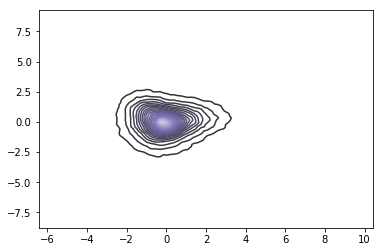

In [30]:
ax = sns.kdeplot(x, y, n_levels=30, cmap="Purples_d")

In [32]:
import pandas as pd

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


In [39]:
test = pd.DataFrame(data=principalComponents)

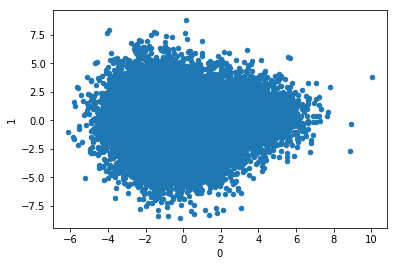

In [40]:
test.plot(x=0, y=1, kind='scatter')

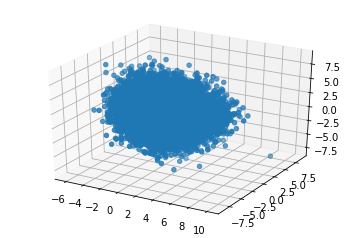

In [47]:
ax = plt.axes(projection='3d')
ax.scatter3D(test[0], test[1], test[2])